In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [2]:
import ast
import re

def fix_number_format(value):
    if isinstance(value, str):
        # Add a comma after an integer followed by a float
        value = re.sub(r'(\d+)\.\s+(\d)', r'\1., \2', value)
        
        # Add commas between numbers wherever necessary
        value = re.sub(r'(?<=\d)\s+(?=[\d\.])', ', ', value)
    return value

def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except Exception as e:
            print(f"Error converting value: {value}, error: {e}")
            return value
    return value

# Apply this function to the relevant columns
columns_to_convert = ['F_max', 'F_stat', 'phi_stat', 'NPQ', 'ETR']

In [3]:
PSI_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI"
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
bode_list = pd.read_csv(list_path + "20241203_chlamy_bode_list_Fm_ok.csv", sep=";", decimal=",")
activation_list = pd.read_csv(list_path + "20241203_chlamy_activation_curve_list.csv", sep=";", decimal=",")

In [4]:
fig_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Figures_analysis/20241304_bode_plot_chlamy/"
record_list = ["P0.015625s", "P0.03125s", "P0.0625s", "P0.125s", "P0.25s", "P0.5s", "P1s", "P2s", "P4s", "P8s", "P16s", "P32s", "P64s", "P128s"]
period_list = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]
frequency_list = [1/period for period in period_list]
ref = ec.Experiment("20240919_ref_AL_data", "PSI", DataType = ".csv", sep = ';')
t_start = np.array([0.0985, 0.146, 0.244, 0.437, 0.826, 1.6, 3.1, 6.2, 12.4, 24.8, 49.65, 99.2, 198.4, 396.8])
t_end = np.array([31.2906, 62.5626, 125.1378, 200.2624, 200.6252, 201.35, 201.801, 204.8, 409.6, 417.6, 835.2, 867.2, 896, 1992.2])
pre_illumination_time = 60




In [5]:
bode_list

,Name,F_max,F_max_source,A_voltage,Amp,Strain,Amp_Ek,Offset_Ek,Cond,Time_start,Date,Replicate,Cell_count_mL
0,20240723_bode_stt71A6_control_1,0.990000,activation,5.00,10.0,stt7,NaN,NaN,control,15.5,23/07/2024,1,NaN
1,20240723_bode_stt71A6_qE_act_1,0.860000,activation,7.75,15.5,stt7,NaN,NaN,qE_act,19.0,23/07/2024,1,NaN
2,20240724_bode_stt71A6_control_2,0.830000,activation,5.00,10.0,stt7,NaN,NaN,control,16.0,24/07/2024,2,NaN
3,20240724_bode_stt71A6_qE_act_2,0.700000,activation,9.00,18.0,stt7,NaN,NaN,qE_act,19.0,24/07/2024,2,NaN
4,20240725_bode_stt71A6_control_3,1.320000,activation,5.00,10.0,stt7,NaN,NaN,control,15.0,25/07/2024,3,NaN
5,20240725_bode_stt71A6_qE_act_3,1.200000,activation,7.00,14.0,stt7,NaN,NaN,qE_act,18.0,25/07/2024,3,NaN
6,20241203_bode_stt71A6_Ek,1.355988,bode,23.70,11.2,stt7,0.25,1.0,control,12.0,03/12/2024,1,803000.0
7,20241203_bode_stt71A6_2Ek,1.305100,bode,46.00,11.2,stt7,0.25,2.0,control,15.5,03/12/2024,1,803000.0
8,20241204_bode_stt71A6_Ek,1.512121,bode,23.70,11.2,stt7,0.25,1.0,control,11.0,04/12/2024,2,594000.0
9,20241204_bode_stt71A6_2Ek,1.459170,bode,46.00,11.2,stt7,0.25,2.0,control,15.5,04/12/2024,2,594000.0


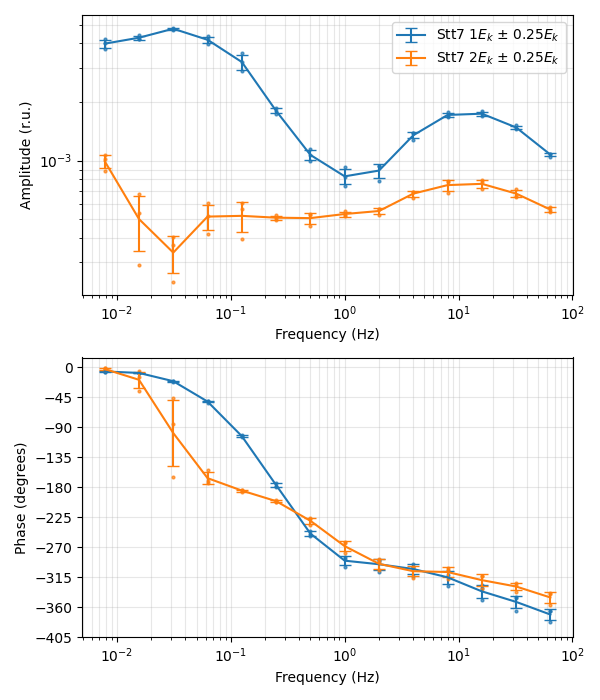

In [7]:
ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
    -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
    -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
    -6.45168624,  -6.61327604]

marker = 2
alpha = 0.7

offsets = [1, 2]
fig, ax = plt.subplots(2, 1, figsize = (6, 7))

for i, offset in enumerate(offsets):
    names = bode_list[(bode_list["Offset_Ek"] == offset) & (bode_list["Replicate"]>0)]["Name"].to_list()

    amplitudes = []
    phases = []
    
    for name in names:
        path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
        harmonics = pd.read_csv(path, index_col= False, sep=";")
        i_list = bode_list[bode_list["Name"] == name].index[0]
        A_input = bode_list.iloc[i_list]["Amp"]
        norm_Fmax = bode_list.iloc[i_list]["F_max"]
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax * A_input), 'o', color = f"C{i}", markersize = marker, alpha = alpha)
        phase = harmonics['P_0'] - 180 - ref_phase
        phase = np.rad2deg(np.unwrap(np.deg2rad(phase[::-1])))[::-1]
        ax[1].semilogx(harmonics['f_input'], phase, 'o', color = f"C{i}", markersize = marker, alpha = alpha)
        amplitudes.append(harmonics['A_0']/(norm_Fmax * A_input))
        phases.append(phase)
    
    label = f"Stt7 {offset}$E_k$ ± 0.25$E_k$"
    amplitudes = np.array(amplitudes)
    phases = np.array(phases)
    mean_amplitude = np.mean(amplitudes, axis = 0)
    std_amplitude = np.std(amplitudes, axis = 0)
    mean_phase = np.mean(phases, axis = 0)
    std_phase = np.std(phases, axis = 0)
    ax[0].errorbar(harmonics['f_input'], mean_amplitude, yerr = std_amplitude, color = f"C{i}", label = label, capsize = 4)
    ax[1].errorbar(harmonics['f_input'], mean_phase, yerr = std_phase, color = f"C{i}", label = label, capsize = 4)
    # ax[0].fill_between(harmonics['f_input'], mean_amplitude - std_amplitude, mean_amplitude + std_amplitude, color = f"C{i}", alpha = 0.1)
    # ax[1].fill_between(harmonics['f_input'], mean_phase - std_phase, mean_phase + std_phase, color = f"C{i}", alpha = 0.1)
    
ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

ax[1].set_ylim(-360, 15)
ax[1].set_yticks(np.arange(-405, 0 + 45, 45))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()
    

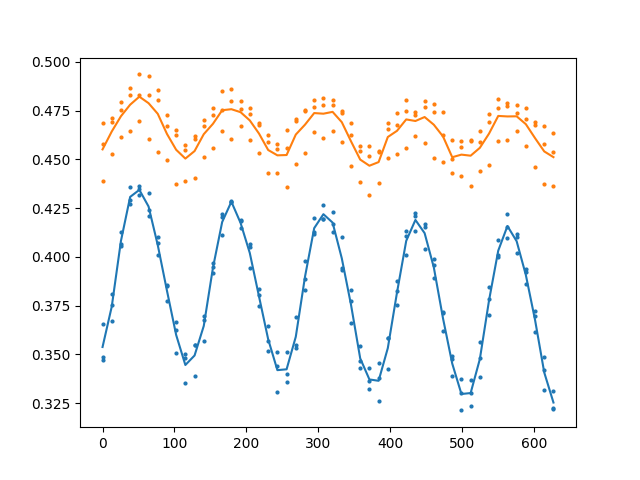

In [8]:
offsets = [1, 2]
per_to_show = 5
period =128
fig, ax = plt.subplots()

for i, offset in enumerate(offsets):
    names = bode_list[bode_list["Offset_Ek"] == offset]["Name"].to_list()
    
    bode_data = []
    bode_times = []
    for name in names:
        F_max_norm = bode_list[bode_list["Name"] == name]["F_max"].values[0]
        exp = ec.Experiment(name, "PSI", DataType = ".csv", sep = ';')
        index_list = record_list.index(f"P{period}s")
        index_exp = exp.records.index(f"P{period}s")
        ind_start = tools.closest_index(exp.clean_times[index_exp], t_start[index_list] + pre_illumination_time)
        ind_end = tools.closest_index(exp.clean_times[index_exp], t_end[index_list] + pre_illumination_time)
        bode_data.append(exp.clean_data[index_exp][ind_start:ind_end]/F_max_norm)
        bode_times.append(exp.clean_times[index_exp][ind_start:ind_end] - exp.clean_times[index_exp][ind_start])
        ax.plot(bode_times[-1][:per_to_show*10], bode_data[-1][:per_to_show*10], 'o', markersize=2, label = "Fluo", color = f'C{i}')
    bode_data = np.array(bode_data)
    ax.plot(bode_times[-1][:per_to_show*10], np.mean(bode_data, axis=0)[:per_to_show*10], '-', markersize=2, label = "Mean", color = f'C{i}')


In [77]:
fig_folder

'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Figures_analysis/20241304_bode_plot_chlamy/'

In [126]:
period_list

[0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]

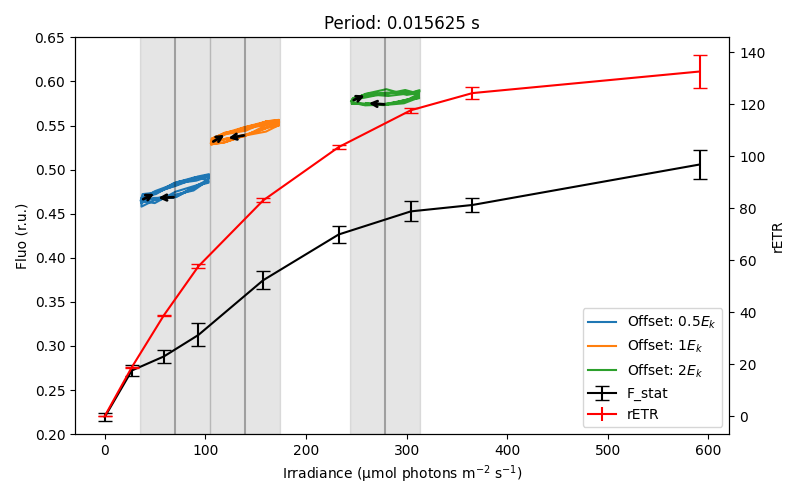

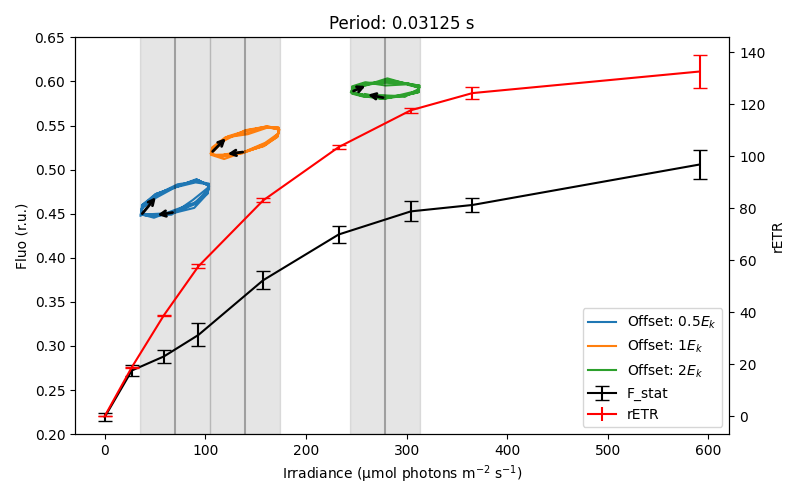

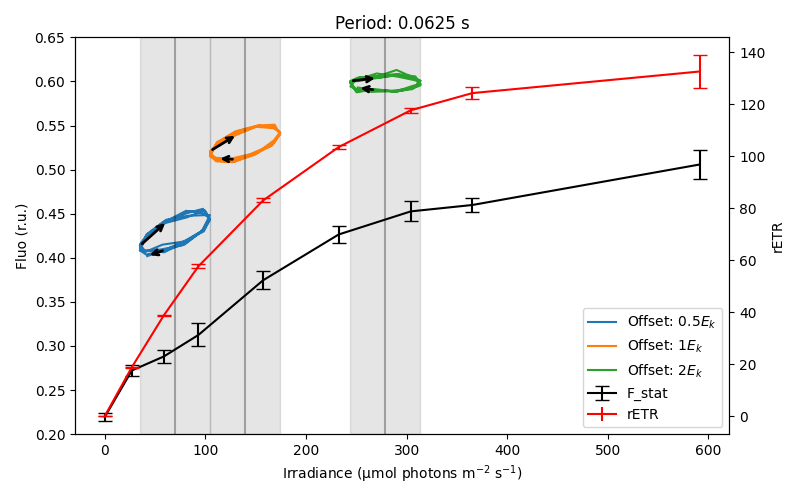

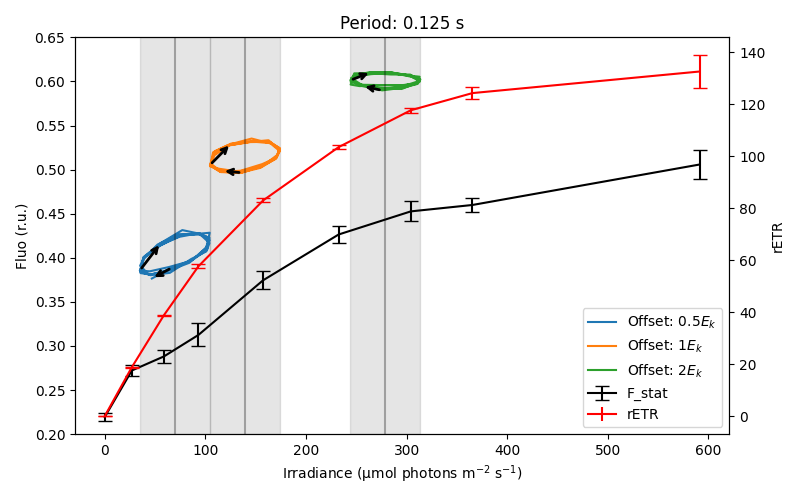

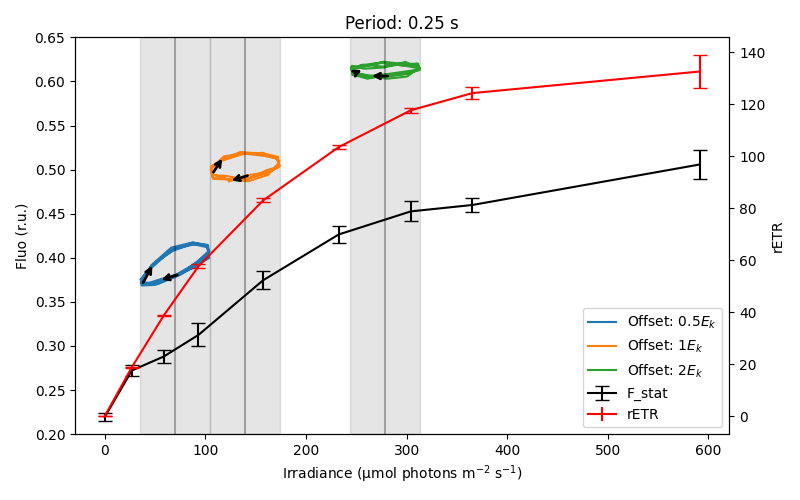

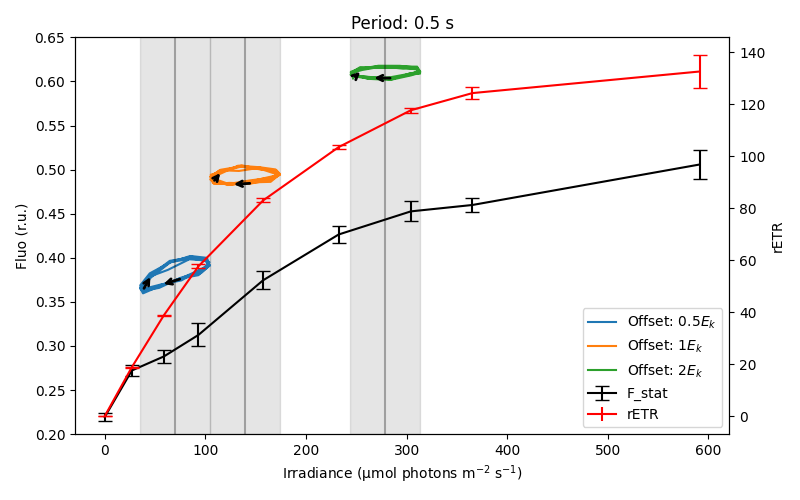

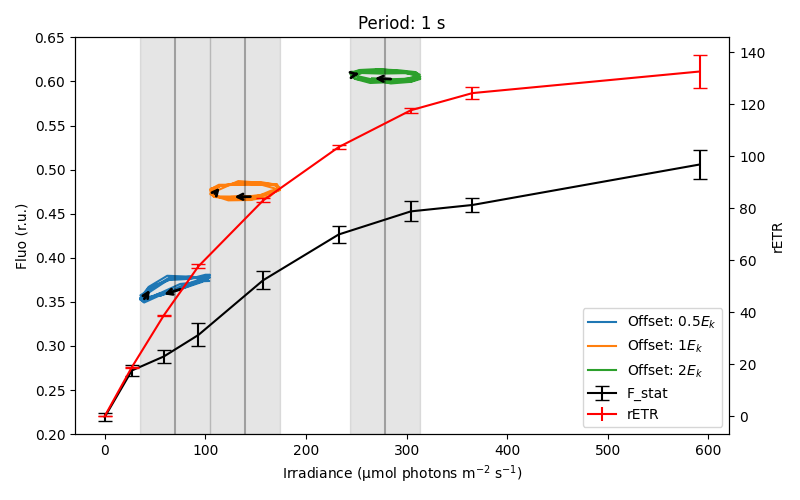

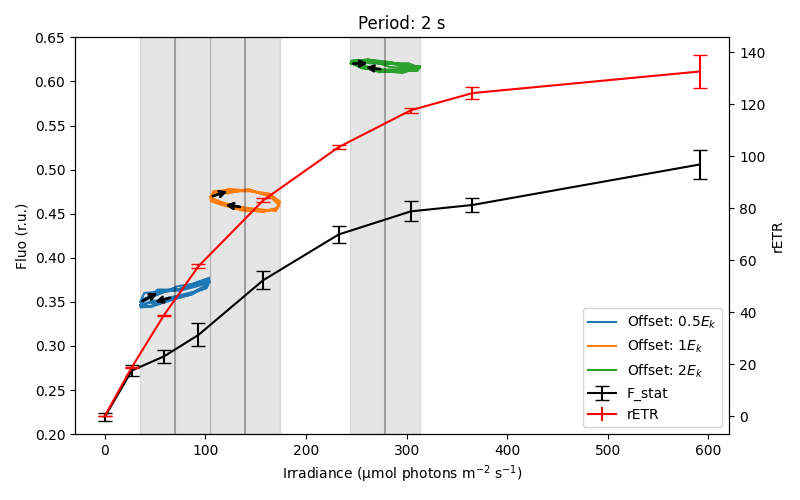

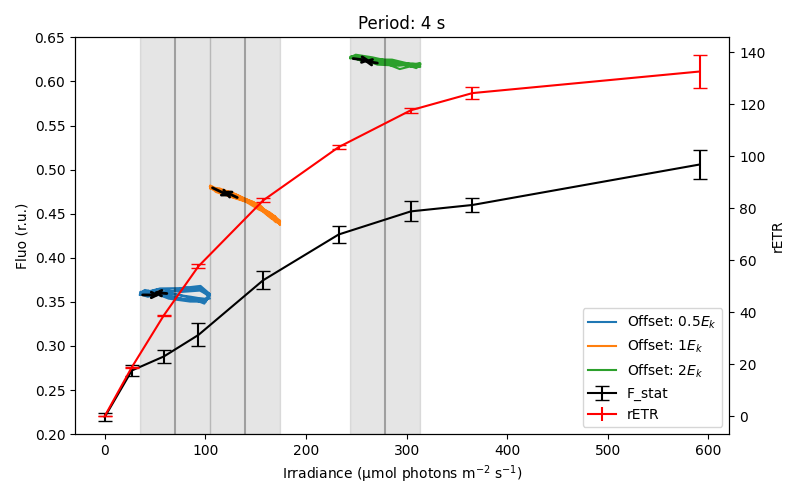

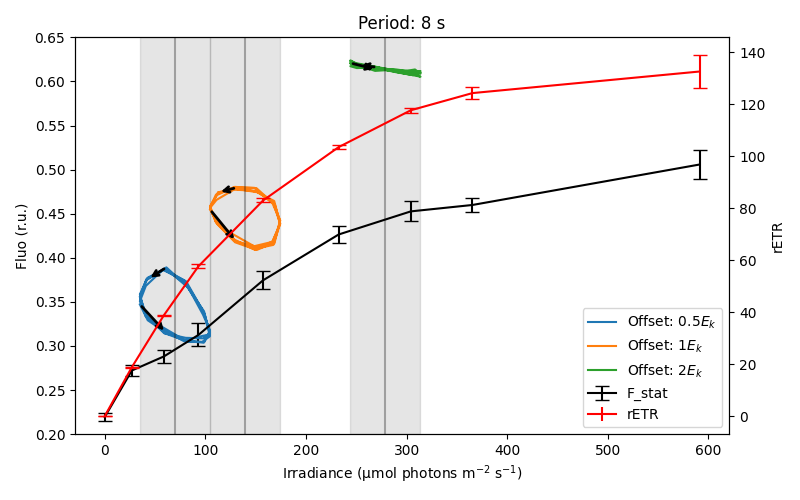

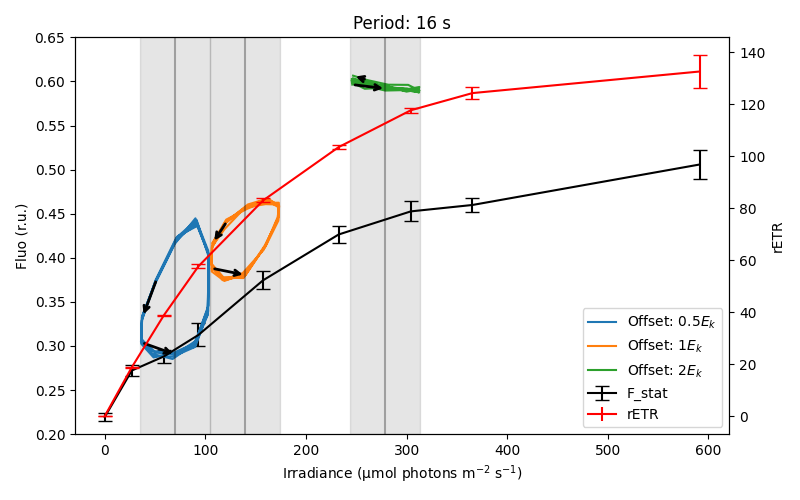

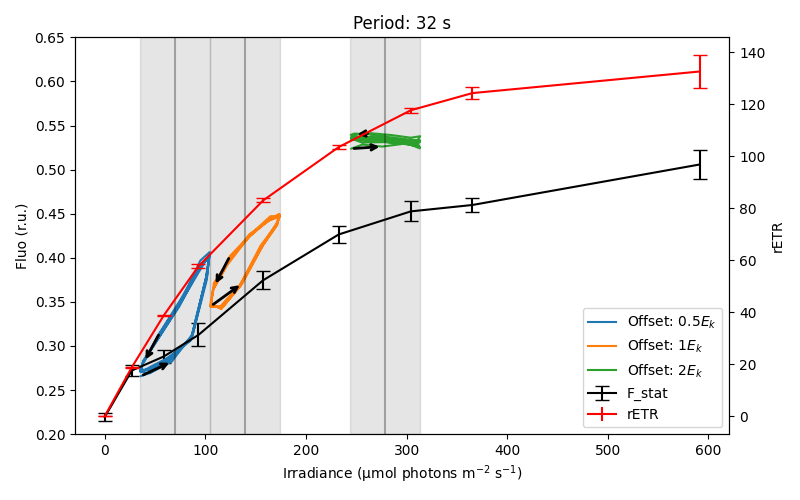

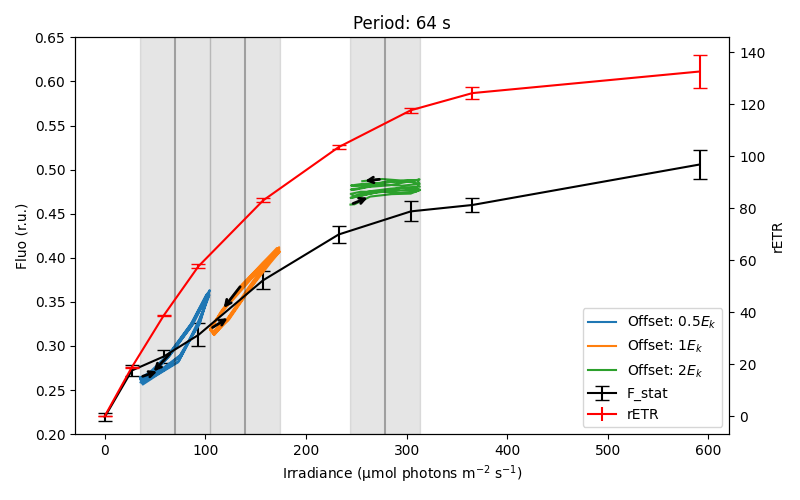

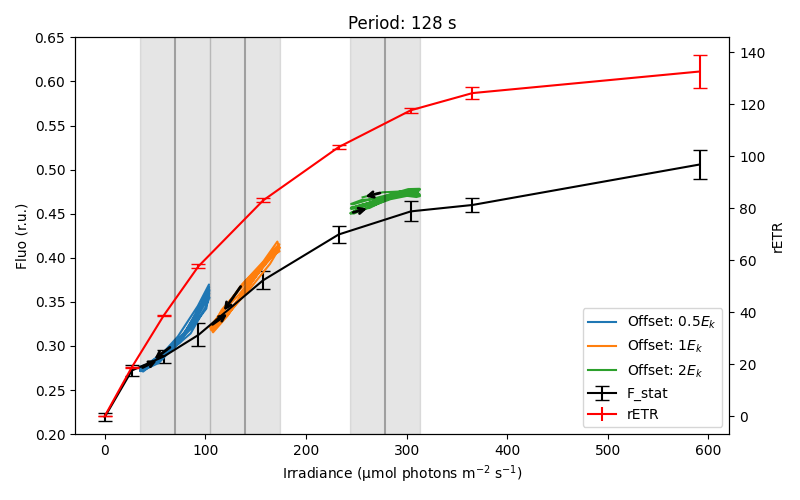

In [9]:
periods = period_list
# periods = [128]
for k, period in enumerate(periods):
    marker = 5
    alpha = 0.7
    n_Fmax_ETR = 2
    end_ETR_fit = 9
    per_to_show = 5
    # period = 32

    all_ETR = []
    ETR = []
    F_stat = []


    fig, ax = plt.subplots(figsize=(8, 5))

    names_activation = activation_list["Name"].to_list()
    offsets = [0.5, 1, 2]
    amp_EK = 0.25
    ax.set_ylim(0.2, 0.65)

    for name in names_activation:
        path = f"{PSI_folder}/{name}/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        for column in columns_to_convert:
            params[column] = params[column].apply(fix_number_format)
            params[column] = params[column].apply(convert_to_list)
        ETR.append([params.ETR[k][3] for k in params.index])
        F_stat.append([params.F_stat[k][3] for k in params.index])

        # ax.plot(params.Actinic, F_stat[-1], 'o', markersize = marker, alpha = alpha, color = f"k")
        
        
    all_ETR.append(ETR)
    ETR = np.array(ETR)
    F_stat = np.array(F_stat)

    ax.errorbar(params.Actinic, F_stat.mean(axis=0), yerr = F_stat.std(axis=0), fmt = '-', color = "k", capsize = 5, label = "F_stat")
        
    all_data_array = np.array([replicate for condition in all_ETR for replicate in condition])
    average = np.mean(all_data_array, axis = 0)
    ax2 = ax.twinx()
    ax2.errorbar(params.Actinic, average, yerr = all_data_array.std(axis=0), fmt = '-', color = "r", capsize = 5)
    ax2.set_ylabel("rETR")
    popt, pcov, xfit, yfit = tools.Ek_fit(params.Actinic[:end_ETR_fit], average[:end_ETR_fit], 0, 700, 100, p0=[100, 100])
    Ek = popt[0]

    for i, offset in enumerate(offsets):
        AL = []
        for j in range(len(ref.clean_data)):
            AL.append(ref.clean_data[j] * amp_EK*Ek + offset*Ek)
        
        bode_names = bode_list[bode_list["Offset_Ek"] == offset]["Name"].to_list()
        bode_data = []
        bode_times = []
        for name in bode_names:
            F_max_norm = bode_list[bode_list["Name"] == name]["F_max"].values[0]
            exp = ec.Experiment(name, "PSI", DataType = ".csv", sep = ';')
            index_list = record_list.index(f"P{period}s")
            index_exp = exp.records.index(f"P{period}s")
            ind_start = tools.closest_index(exp.clean_times[index_exp], t_start[index_list] + pre_illumination_time)
            ind_end = tools.closest_index(exp.clean_times[index_exp], t_end[index_list] + pre_illumination_time)
            bode_data.append(exp.clean_data[index_exp][ind_start:ind_end]/F_max_norm)
            bode_times.append(exp.clean_times[index_exp][ind_start:ind_end] - exp.clean_times[index_exp][ind_start])
            # ax.plot(AL[index_list][-per_to_show*10:], bode_data[-1][-per_to_show*10:], 'o', markersize=2, color = f'C{i}')
        bode_data = np.array(bode_data)
        light = AL[index_list][-per_to_show*10:]
        fluo = np.mean(bode_data, axis=0)[-per_to_show*10:]
        ax.plot(light, np.mean(bode_data, axis=0)[-per_to_show*10:], '-', markersize=2, color = f'C{i}', label = f"Offset: {offset}$E_k$")
        ax.annotate("", xy=(light[0], fluo[0]), xytext=(light[2], fluo[2]), arrowprops=dict(arrowstyle="<-", linewidth=2))
        ax.annotate("", xy=(light[-2], fluo[-2]), xytext=(light[-1], fluo[-1]), arrowprops=dict(arrowstyle="<-", linewidth=2))
        

    ylim = ax.get_ylim()
    for i, offset in enumerate(offsets):
        ax.fill_betweenx([ylim[0], ylim[1]], offset*Ek - amp_EK*Ek, offset*Ek + amp_EK*Ek, alpha=0.1, color = "k")
        ax.axvline(offset*Ek, color = "k", alpha = 0.3)
        
    ax.errorbar([], [], yerr = [], fmt = '-', color = "r", capsize = 5, label = "rETR")
    ax.set_ylim(ylim)
    ax.set_xlabel("Irradiance (µmol photons m$^{-2}$ s$^{-1}$)")
    ax.set_ylabel("Fluo (r.u.)")
    ax.legend(loc = "lower right")
    ax.set_title(f"Period: {period} s")

    fig.tight_layout()

    fig.savefig(f"{fig_folder}phase_space_{k}_{period}s.png", dpi=300)



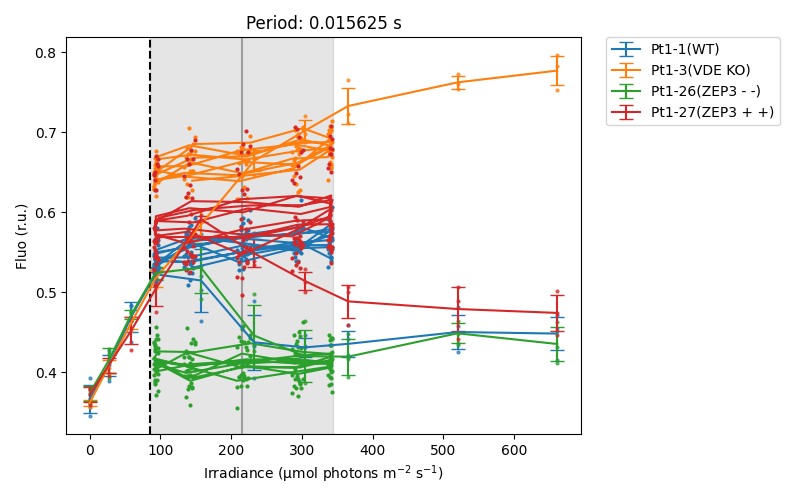

In [ ]:
marker = 2
alpha = 0.7
Ek_amp = 0.25

offsets = [1, 2]
fig, ax = plt.subplots(figsize=(8, 5))

all_ETR = []
labels = []

for i, strain in enumerate(strains):
    names = activation_list[(activation_list["offset_Ek"] == strain) & (activation_list["Final protocol"] == "yes")]["Name"].to_list()
    labels.append(strain + f"({activation_list[activation_list.Name == names[0]]['Label'].values[0]})")

    ETR = []
    F_stat = []
    
    for name in names:
        path = f"{PSI_folder}/{name}/params.csv"
        params = pd.read_csv(path, index_col= False, sep=";")
        for column in columns_to_convert:
            params[column] = params[column].apply(fix_number_format)
            params[column] = params[column].apply(convert_to_list)
        ETR.append([params.ETR[k][3] for k in params.index])
        F_stat.append([params.F_stat[k][3] for k in params.index])
    
        ax.plot(params.Actinic, F_stat[-1], 'o', markersize = marker, alpha = alpha, color = f"C{i}")
    
    
    all_ETR.append(ETR)
    ETR = np.array(ETR)
    F_stat = np.array(F_stat)
    
    ax.errorbar(params.Actinic, F_stat.mean(axis=0), yerr = F_stat.std(axis=0), fmt = '-', color = f"C{i}", label = labels[i], capsize = 5)
    
all_data_array = np.array([replicate for condition in all_ETR for replicate in condition])
average = np.mean(all_data_array, axis = 0)
popt, pcov, xfit, yfit = tools.Ek_fit(params.Actinic[:7], average[:7], 0, 700, 100, p0=[100, 100])
Ek = popt[0]


ylim = ax.get_ylim()
ax.axvline(Ek, color = "k", linestyle = "--")
ax.axvline(Ek*Ek_offset, color = "gray", linestyle = "-", alpha = 0.7)
ax.fill_betweenx(ylim, Ek*Ek_offset - Ek*Ek_amp, Ek*Ek_offset + Ek*Ek_amp, color = "k", alpha = 0.1)
ax.set_ylim(ylim)
ax.set_xlabel("Irradiance (µmol photons m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("Fluo (r.u.)")

per_to_show = 5
period = 0.015625
for i, strain in enumerate(strains):
    if strain == "Pt1-1":
        names = bode_list[(bode_list["Strain"] == strain) & (bode_list["Replicate"]!=1)]["Name"].to_list()
    elif strain == "Pt1-3":
        names = bode_list[(bode_list["Strain"] == strain) & (bode_list["Replicate"]!=1)]["Name"].to_list()
    else:
        names = bode_list[bode_list["Strain"] == strain]["Name"].to_list()
    
    bode_data = []
    bode_times = []
    for name in names:
        F_max_norm = bode_list[bode_list["Name"] == name]["F_max"].values[0]
        exp = ec.Experiment(name, "PSI", DataType = ".csv", sep = ';')
        index_list = record_list.index(f"P{period}s")
        index_exp = exp.records.index(f"P{period}s")
        ind_start = tools.closest_index(exp.clean_times[index_exp], t_start[index_list] + pre_illumination_time)
        ind_end = tools.closest_index(exp.clean_times[index_exp], t_end[index_list] + pre_illumination_time)
        bode_data.append(exp.clean_data[index_exp][ind_start:ind_end]/F_max_norm)
        bode_times.append(exp.clean_times[index_exp][ind_start:ind_end] - exp.clean_times[index_exp][ind_start])
        ax.plot(ref.clean_data[index_list][-per_to_show*10:], bode_data[-1][-per_to_show*10:], 'o', markersize=2, color = f'C{i}')
    bode_data = np.array(bode_data)
    ax.plot(ref.clean_data[index_list][-per_to_show*10:], np.mean(bode_data, axis=0)[-per_to_show*10:], '-', markersize=2, color = f'C{i}')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_title(f"Period: {period} s")
fig.tight_layout()


